In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.superresolution import SuperResolutionProcessor
from src.utils.utils import postprocess
from src.utils.open_utils import open_raw, open_burst_of_frames

In [2]:
directory = "./imgs6"
filename = "./imgs6/20171106_subset_bursts_33TJ_20150612_193954_263_payload_N000.dng"
up, down, left, right = 500, 650, 850, 1000
test_img, info = open_raw(filename)
orig_size_img = open_raw(filename, half_size=False)[0][up* 2: down * 2, left * 2: right * 2]

In [3]:
sr_processor = SuperResolutionProcessor()

In [4]:
n_imgs = 8
burst, infos = open_burst_of_frames(directory, img_indices=range(0, n_imgs),up=up, down=down, left=left, right=right)
raw_burst, infos = open_burst_of_frames(directory, img_indices=range(0, n_imgs),up=up, down=down, left=left, right=right, raw_needed=True)


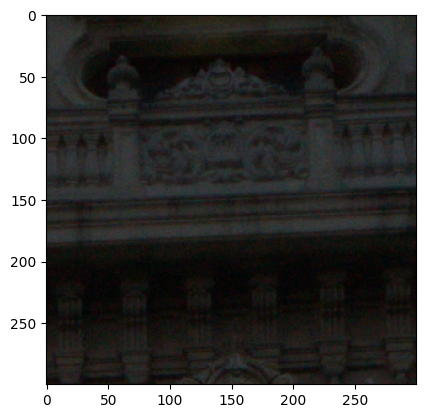

In [5]:
plt.imshow(orig_size_img)

In [7]:
sr_processor = SuperResolutionProcessor()

In [8]:
res = sr_processor.process_burst(burst, raw_burst, verbose=True)

alignment for shape (150, 150, 3) taken 0.6165251731872559 seconds
alignment for shape (150, 150, 3) taken 0.6129307746887207 seconds
alignment for shape (150, 150, 3) taken 0.5629818439483643 seconds
alignment for shape (150, 150, 3) taken 0.5753304958343506 seconds
alignment for shape (150, 150, 3) taken 0.5664157867431641 seconds
alignment for shape (150, 150, 3) taken 0.6263628005981445 seconds
alignment for shape (150, 150, 3) taken 0.6874179840087891 seconds
alignment for shape (150, 150, 3) taken 0.5898120403289795 seconds
Optical flow took 4.843786954879761 seconds
Got structure_tensor
Got cov matrixes
Got weights for 0 frame in 9.722615957260132 seconds
Got weights for 1 frame in 8.813604593276978 seconds
Got weights for 2 frame in 8.672443866729736 seconds
Got weights for 3 frame in 8.543473958969116 seconds
Got weights for 4 frame in 8.447879076004028 seconds
Got weights for 5 frame in 9.364499568939209 seconds
Got weights for 6 frame in 9.65680193901062 seconds
Got weights 

100%|█████████████████████████████████████████████████████████████████████████████████| 300/300 [01:40<00:00,  2.99it/s]


Got structure_tensor
Got cov matrixes
Got weights for 0 frame in 36.40494656562805 seconds
Got weights for 1 frame in 36.08767580986023 seconds
Got weights for 2 frame in 37.964685678482056 seconds
Got weights for 3 frame in 35.155988931655884 seconds
Got weights for 4 frame in 33.75550103187561 seconds
Got weights for 5 frame in 33.66434168815613 seconds
Got weights for 6 frame in 35.90892457962036 seconds
Got weights for 7 frame in 34.190706968307495 seconds
Got 294.0521092414856 seconds for processing
Kernel regression took 404.355197429657 seconds
(600, 600, 3)


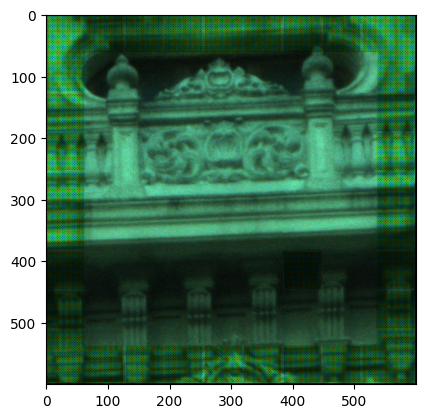

In [9]:
plt.imshow(res / res.max())

In [10]:
info

{'white_balance': [2.1147983074188232,
  0.9966332912445068,
  1.3498878479003906,
  0.0],
 'color_matrix': array([[ 1.916442  , -0.9210311 ,  0.00458907],
        [-0.21984497,  1.494486  , -0.27464095],
        [ 0.01460472, -0.57629657,  1.5616919 ]], dtype=float32),
 'white_level': 1023}

In [11]:
white_balance, color_matrix, white_level = info['white_balance'], info['color_matrix'], info['white_level']

In [12]:
postprocessed = postprocess(res, white_balance, color_matrix, white_level)

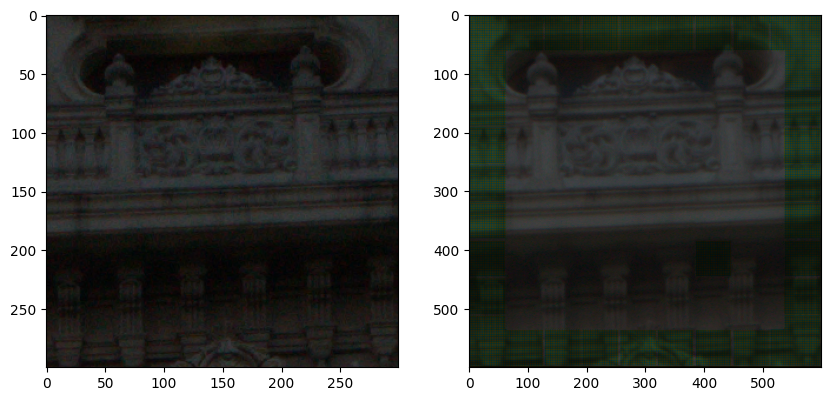

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(orig_size_img)
axes[1].imshow(postprocessed)

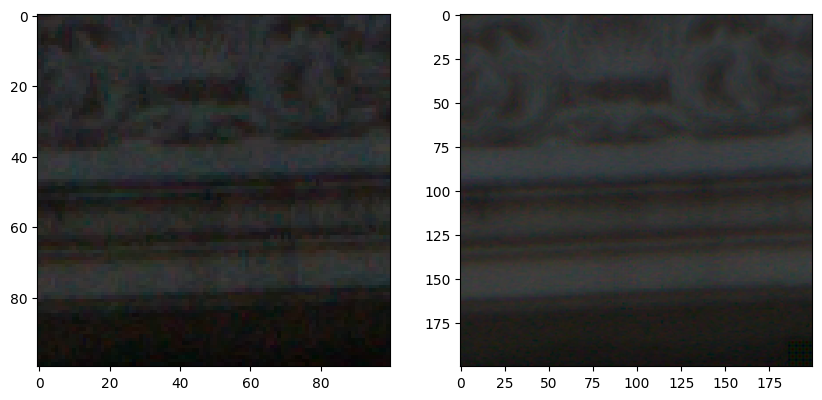

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(orig_size_img[100:200, 100:200])
axes[1].imshow(postprocessed[200:400, 200:400])